In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


# Générer des données de hauteur d'eau fictives pour l'exemple
temps = np.arange(0, 10, 0.1)  # Temps de 0 à 10 secondes avec un pas de 0.1 seconde
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

# Fonction de modèle avec une somme de cosinus
def modele_fourier(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Estimation des paramètres du modèle à partir des données
parametres_initiaux = [0] + [1, 1, 0] * 2  # Z, Ac1, Wc1, Lc1, Ac2, Wc2, Lc2, ...
parametres_optimaux, _ = curve_fit(modele_fourier, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_fourier(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de Fourier', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec la méthode de Fourier')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1600.

In [8]:
print("Z = ",parametres_optimaux[0])
print("Ac = ", parametres_optimaux[1])
print("Wc = ", parametres_optimaux[2])
print("Lc = ", parametres_optimaux[3])

Z =  0.10625777546042935
Ac =  3.3614470473675597
Wc =  -32226.90858503952
Lc =  296.263356823104


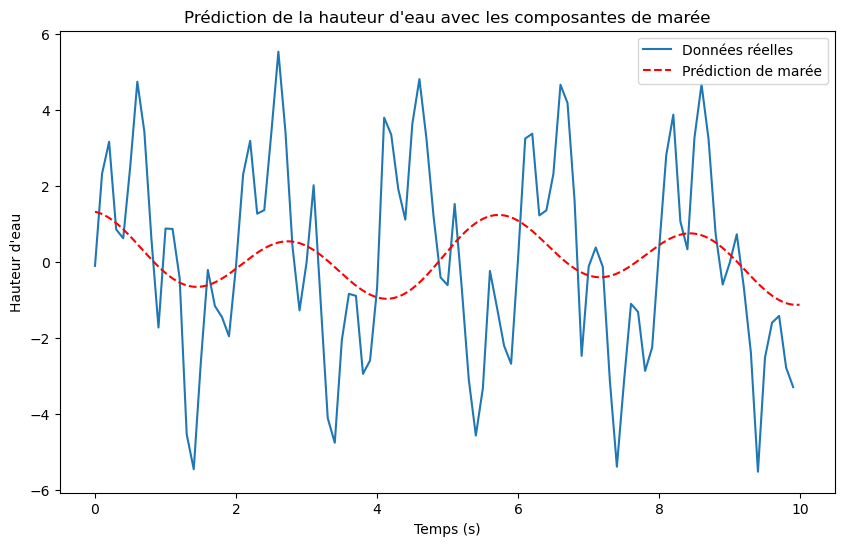

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Supposons que vous ayez les composantes de marée du site NOAA (amplitudes, fréquences, déphasages)
composantes_de_maree = [[1.0, 2.0, 0.0], [0.5, 1.5, np.pi/2]]  # Exemple de données de composantes de marée

# Estimation des paramètres du modèle à partir des composantes de marée
parametres_initiaux = [0] + [c for composante in composantes_de_maree for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les composantes de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne
amplitudes = [0.492, 0.149, 0.113, 0.357, 0.002, 0.223, 0.0, 0.001, 0.001, 0.001, 0.022, 0.001, 0.014, 0.014,
              0.011, 0.003, 0.007, 0.013, 0.021, 0.0, 0.0, 0.07, 0.0, 0.008, 0.007, 0.04, 0.009, 0.0, 0.005,
              0.113, 0.002, 0.003, 0.008, 0.001]  # Exemple d'amplitudes
frequences = [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832,
               28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747,
               0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286,
               14.958931, 31.015896, 43.47616, 29.528479]  # Exemple de fréquences
dephasages = [296.3, 283.7, 276.0, 94.4, 171.0, 87.3, 0.0, 243.6, 185.1, 118.4, 282.4, 43.6, 239.6, 250.9,
               118.5, 305.9, 206.7, 114.2, 102.2, 0.0, 0.0, 190.2, 0.0, 120.5, 85.2, 84.3, 271.2, 0.0, 91.5,
               92.5, 104.1, 13.1, 293.0]  # Exemple de déphasages

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = parametres[i + 1]
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * t - Lc)
    return resultat

# Estimation des paramètres du modèle à partir des données spécifiques
parametres_initiaux = [Z] + [c for composante in zip(amplitudes, frequences, dephasages) for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 10, 0.01)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les composantes de marée spécifiques')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 20200.

Enter the path to your CSV file: hc.csv
Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


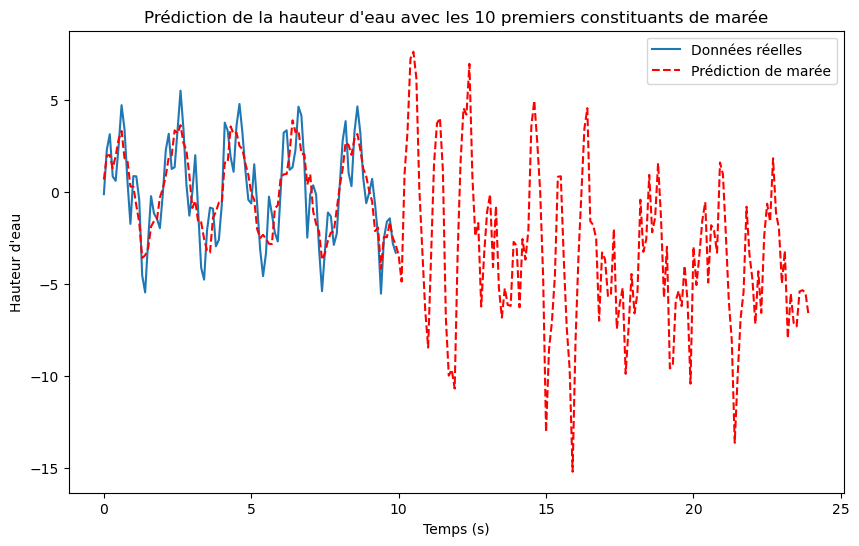

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv
# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne


def extract_data_from_csv():
    csv_file = input("Enter the path to your CSV file: ")
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            speed = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(speed)
            phases.append(phase)

    return amplitudes, frequencies, phases

# Example usage:
amplitudes, frequencies, phases = extract_data_from_csv()

print("Amplitudes:", amplitudes)
print("Frequencies:", frequencies)
print("Phases:", phases)

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = 2*3.14*(parametres[i + 1])/360
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * (t/3600) - Lc)
    return resultat

# Estimation des paramètres du modèle à partir des données spécifiques
parametres_initiaux = [Z] + [c for composante in zip(amplitudes, frequences, dephasages) for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux, maxfev=90000)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 24, 0.1)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les 10 premiers constituants de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()



In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import csv

# Données spécifiques pour le Port San Luis, CA (hauteur d'eau moyenne, amplitudes, fréquences, déphasages)
Z = 0.0  # Hauteur d'eau moyenne
temps = np.arange(0, 10, 0.1)  # Temps de 0 à 10 secondes avec un pas de 0.1 seconde
hauteur_eau = 3 * np.sin(2 * np.pi * 0.5 * temps) + 2 * np.sin(2 * np.pi * 2 * temps) + 0.5 * np.random.normal(size=len(temps))

#get a real harmonic constituent values 
def extract_data_from_csv():
    csv_file = input("Enter the path to your CSV file: ")
    amplitudes = []
    frequencies = []
    phases = []

    with open(csv_file, 'r') as file:
        csv_reader = csv.DictReader(file)
        for row in csv_reader:
            amplitude = float(row['Amplitude'])
            phase = float(row['Phase'])
            speed = float(row['Speed'])

            amplitudes.append(amplitude)
            frequencies.append(speed)
            phases.append(phase)

    return amplitudes, frequencies, phases

amplitudes, frequencies, phases = extract_data_from_csv()

print("Amplitudes:", amplitudes)
print("Frequencies:", frequencies)
print("Phases:", phases)

# Fonction de modèle avec une somme de cosinus basée sur les composantes de marée spécifiques
def modele_marée(t, Z, *parametres):
    resultat = Z
    for i in range(0, len(parametres), 3):
        Ac = parametres[i]
        Wc = 2*3.14*(parametres[i + 1])/360
        Lc = parametres[i + 2]
        resultat += Ac * np.cos(Wc * (t/3600) - Lc)
    return resultat

# Supposons que vous ayez les composantes de marée du site NOAA (amplitudes, fréquences, déphasages)
composantes_de_maree = [[1.0, 2.0, 0.0], [0.5, 1.5, np.pi/2]]  # Exemple de données de composantes de marée

# Estimation des paramètres du modèle à partir des données spécifiques
parametres_initiaux = [Z] + [c for composante in zip(amplitudes, frequencies, phases) for c in composante]
parametres_optimaux, _ = curve_fit(modele_marée, temps, hauteur_eau, p0=parametres_initiaux, maxfev=1000000)

# Générer des points temporels pour la prédiction
temps_prediction = np.arange(0, 24, 0.1)

# Faire la prédiction
hauteur_eau_predite = modele_marée(temps_prediction, *parametres_optimaux)

# Afficher les résultats
plt.figure(figsize=(10, 6))
plt.plot(temps, hauteur_eau, label='Données réelles')
plt.plot(temps_prediction, hauteur_eau_predite, label='Prédiction de marée', linestyle='--', color='red')
plt.title('Prédiction de la hauteur d\'eau avec les 10 premiers constituants de marée')
plt.xlabel('Temps (s)')
plt.ylabel('Hauteur d\'eau')
plt.legend()
plt.show()




Enter the path to your CSV file: hc.csv
Amplitudes: [3.52, 0.88, 0.71, 2.74, 0.07, 1.51, 0.03, 0.11, 0.0, 0.03, 0.15, 0.0, 0.11, 0.08, 0.1, 0.07, 0.05, 0.09, 0.13, 0.0, 0.11, 0.25, 0.0, 0.07, 0.05, 0.25, 0.05, 0.01, 0.03, 0.85, 0.03, 0.02, 0.15, 0.11, 0.26, 0.0, 0.04]
Frequencies: [28.984104, 30.0, 28.43973, 15.041069, 57.96821, 13.943035, 86.95232, 44.025173, 60.0, 57.423832, 28.512583, 90.0, 27.968208, 27.895355, 16.139101, 29.455626, 15.0, 14.496694, 15.5854435, 0.5443747, 0.0821373, 0.0410686, 1.0158958, 1.0980331, 13.471515, 13.398661, 29.958933, 30.041067, 12.854286, 14.958931, 31.015896, 43.47616, 29.528479, 42.92714, 30.082138, 115.93642, 58.984104]
Phases: [138.7, 157.0, 113.2, 156.6, 96.4, 143.0, 337.9, 85.8, 0.0, 74.6, 126.7, 0.0, 12.8, 85.5, 199.7, 172.7, 284.2, 203.8, 190.5, 0.0, 230.4, 292.5, 0.0, 131.7, 138.8, 142.7, 157.4, 157.6, 148.6, 156.9, 34.4, 354.5, 179.8, 63.2, 157.2, 0.0, 118.0]


TypeError: The number of func parameters=112 must not exceed the number of data points=100